In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Análise Inicial com os dados dos anos 2000

In [44]:
df = pd.read_csv('datasets/sdt2000s.csv')
df

,date,title,comments,id,english_title,release_date,vote_average
0,2022-01-03,Os Smurfs 2,(início da temporada da Sessão da Tarde de Fér...,77931.0,The Smurfs 2,2013-07-30,5.770
1,2022-01-12,A Ressurreição de Gavin Stone,NaN,422114.0,The Resurrection of Gavin Stone,2017-01-20,6.000
2,2022-01-11,Quero Ficar com Polly,NaN,5966.0,Along Came Polly,2004-01-16,5.981
3,2022-01-20,Patrick,NaN,199578.0,Patrick,2013-10-15,5.000
4,2022-01-26,Uma Razão Para Recomeçar,(exceto para o RS - Vale a Pena Ver de Novo e ...,444951.0,New Life,2016-10-28,6.800
...,...,...,...,...,...,...,...
5583,2000-12-20,NaN,NaN,NaN,NaN,NaN,NaN
5584,2000-12-28,Mestres do Universo,NaN,1002389.0,He-Man - Mestres do Universo,NaN,0.000
5585,2000-12-29,Os Três Mosqueteiros Trapalhões,NaN,172501.0,Os Três Mosqueteiros Trapalhões,1980-03-05,5.200
5586,2000-08-23,O Grande Assalto,NaN,837155.0,O Grande Assalto,1967-07-20,0.000


In [45]:
df.dropna(subset=['title'], inplace=True)

In [47]:
df['release_year'] = df['release_date'].str[:4].astype(float)
df['year'] = df['date'].str[:4].astype(float)

df['diff'] = df['year'] - df['release_year']

In [48]:
rows_to_delete = df.loc[df['diff'] < 0]
df.drop(rows_to_delete.index, inplace=True)

In [79]:
df.dropna(subset=['release_date'], inplace = True)

In [81]:
df.head(3)

,date,title,comments,id,english_title,release_date,vote_average,release_year,year,diff
0,2022-01-03,Os Smurfs 2,(início da temporada da Sessão da Tarde de Fér...,77931.0,The Smurfs 2,2013-07-30,5.770,2013.0,2022.0,9.0
1,2022-01-12,A Ressurreição de Gavin Stone,NaN,422114.0,The Resurrection of Gavin Stone,2017-01-20,6.000,2017.0,2022.0,5.0
2,2022-01-11,Quero Ficar com Polly,NaN,5966.0,Along Came Polly,2004-01-16,5.981,2004.0,2022.0,18.0


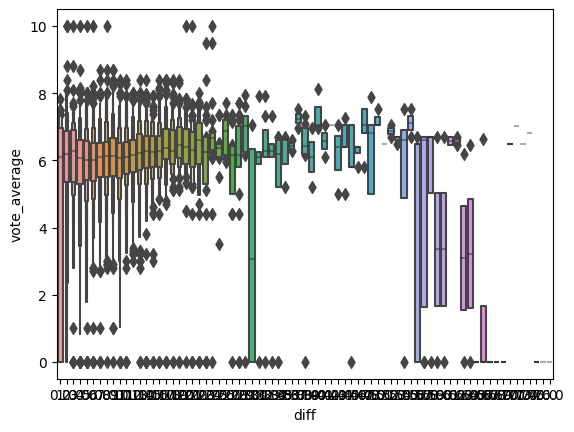

In [82]:
sns.boxenplot(x='diff', y='vote_average', data=df)
plt.show()

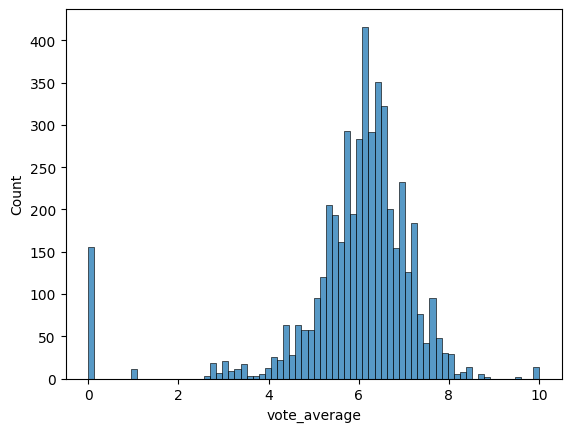

In [50]:
sns.histplot(df['vote_average'])
plt.show()

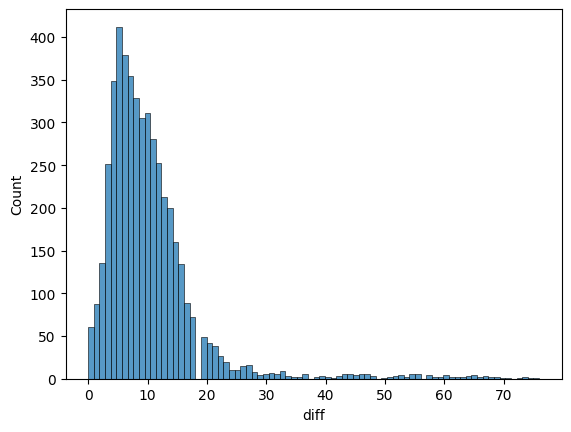

In [51]:
sns.histplot(df['diff'])
plt.show()

In [52]:
df['diff'].describe()

count    4753.000000
mean       10.295182
std         8.707471
min         0.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        76.000000
Name: diff, dtype: float64

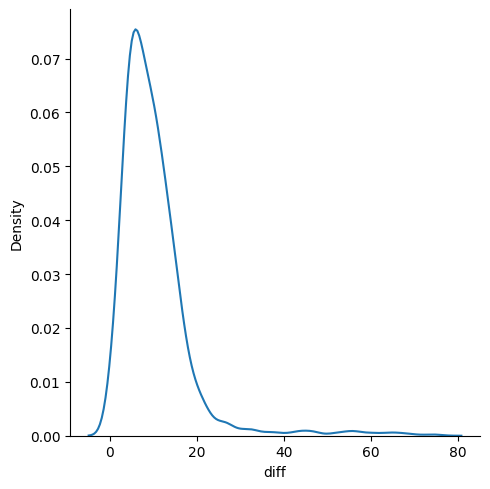

In [53]:
sns.displot(data = df, x = 'diff', kind = 'kde')
plt.show()

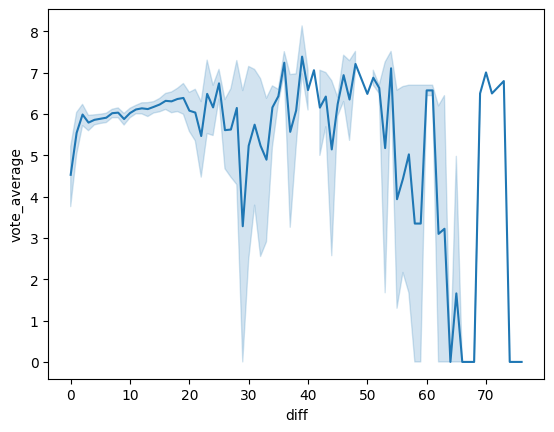

In [57]:
sns.lineplot(data = df, x = 'diff', y = 'vote_average')
plt.show()

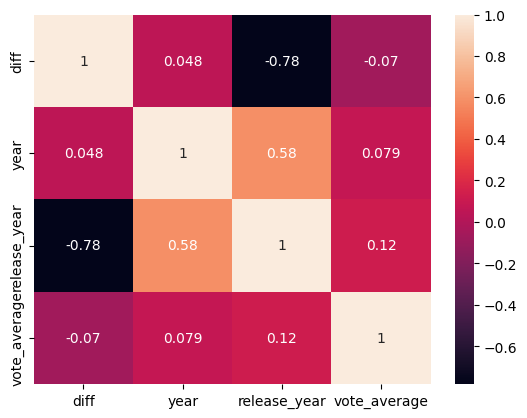

In [66]:
sns.heatmap(df[['diff', 'year', 'release_year', 'vote_average']].corr(), annot=True)
plt.show()

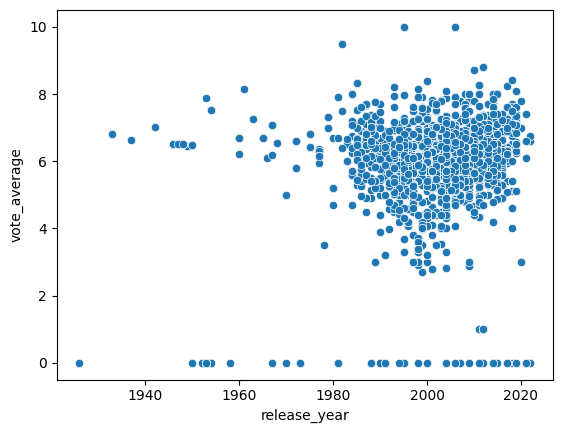

In [70]:
sns.scatterplot(x = 'release_year', y = 'vote_average', data=df)
plt.show()

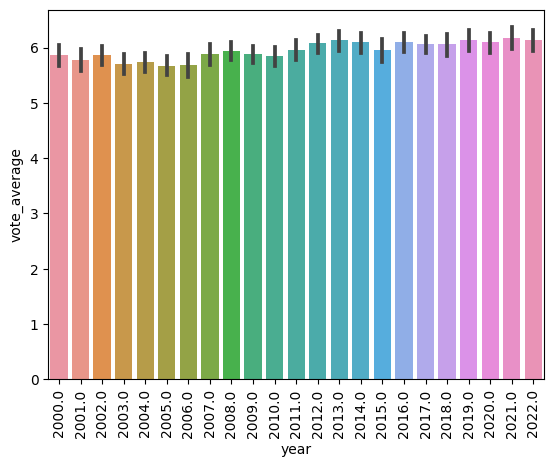

In [99]:
sns.barplot(x = 'year', y = 'vote_average', data=df)
plt.xticks(rotation=90)
plt.show()

In [43]:
from collections import Counter

In [62]:
stars = []

In [63]:
for i in range(len(df)):
    stars.extend(df['starrings'][i].split(', '))

In [70]:
Counter(stars).most_common(10) # top 10 estrelas sessão da tarde em 2022

[('Adam Sandler', 10),
 ('Jackie Chan', 8),
 ('Steve Carell', 5),
 ('Rachel McAdams', 4),
 ('Bradley Cooper', 4),
 ('Maggie Gyllenhaal', 4),
 ('Vince Vaughn', 4),
 ('Cameron Diaz', 4),
 ('Chris Tucker', 4),
 ('Josh Duhamel', 3)]

In [39]:
df[df['starrings'].str.contains('Adam Sandler')]

,data,title,comments,year,movie_id,english_title,starrings,release,rating,diff
11,18/01,Gente Grande,NaN,2022,tt1375670,Grown Ups,"Adam Sandler, Salma Hayek",2010,5.9,12
24,04/02,Pixels,NaN,2022,tt2120120,Pixels,"Adam Sandler, Kevin James",2015,5.6,7
51,16/03,Click,(reclassificado para 12 anos),2022,tt0389860,Click,"Adam Sandler, Kate Beckinsale",2006,6.4,16
69,13/04,Como Se Fosse a Primeira Vez,NaN,2022,tt0343660,50 First Dates,"Adam Sandler, Drew Barrymore",2004,6.8,18
106,06/06,Um Faz de Conta Que Acontece,NaN,2022,tt0960731,Bedtime Stories,"Adam Sandler, Keri Russell",2008,6.0,14
116,20/06,Esposa de Mentirinha,NaN,2022,tt1564367,Just Go with It,"Adam Sandler, Jennifer Aniston",2011,6.4,11
146,01/08,Pixels,NaN,2022,tt2120120,Pixels,"Adam Sandler, Kevin James",2015,5.6,7
176,12/09,Gente Grande,NaN,2022,tt1375670,Grown Ups,"Adam Sandler, Salma Hayek",2010,5.9,12
188,30/09,Click,(término da exibição após O Cravo e a Rosa),2022,tt0389860,Click,"Adam Sandler, Kate Beckinsale",2006,6.4,16
203,21/10,Como Se Fosse a Primeira Vez,NaN,2022,tt0343660,50 First Dates,"Adam Sandler, Drew Barrymore",2004,6.8,18


In [38]:
df[df['starrings'].str.contains('Jackie Chan')]

,data,title,comments,year,movie_id,english_title,starrings,release,rating,diff
8,13/01,O Medalhão,NaN,2022,tt0288045,The Medallion,"Jackie Chan, Lee Evans",2003,5.2,19
32,17/02,O Terno de 2 Bilhões de Dólares,NaN,2022,tt0290095,The Tuxedo,"Jackie Chan, Jennifer Love Hewitt",2002,5.4,20
70,14/04,A Hora do Rush 2,NaN,2022,tt0266915,Rush Hour 2,"Jackie Chan, Chris Tucker",2001,6.7,21
71,15/04,Hop: Rebelde Sem Páscoa,NaN,2022,tt0266915,Rush Hour 2,"Jackie Chan, Chris Tucker",2001,6.7,21
109,09/06,A Hora do Rush 3,NaN,2022,tt0293564,Rush Hour 3,"Jackie Chan, Chris Tucker",2007,6.2,15
114,16/06,Bater Ou Correr Em Londres,NaN,2022,tt0300471,Shanghai Knights,"Jackie Chan, Owen Wilson",2003,6.2,19
169,01/09,O Medalhão,NaN,2022,tt0288045,The Medallion,"Jackie Chan, Lee Evans",2003,5.2,19
193,07/10,A Hora do Rush 2,NaN,2022,tt0266915,Rush Hour 2,"Jackie Chan, Chris Tucker",2001,6.7,21


In [71]:
df[df['starrings'].str.contains('Steve Carell')]

,data,title,comments,year,movie_id,english_title,starrings,release,rating,diff
76,22/04,A Volta do Todo Poderoso,(inédito na Globo; ex-RecordTV),2022,tt0413099,Evan Almighty,"Steve Carell, Morgan Freeman",2007,5.4,15
91,16/05,Meu Malvado Favorito,(inédito na TV Globo; ex-RecordTV),2022,tt1323594,Despicable Me,"Steve Carell, Jason Segel",2010,7.6,12
100,27/05,Agente 86 (2008),NaN,2022,tt0425061,Get Smart,"Steve Carell, Anne Hathaway",2008,6.5,14
151,08/08,Meu Malvado Favorito 2,(inédito na TV Globo; ex-RecordTV),2022,tt1690953,Despicable Me 2,"Steve Carell, Kristen Wiig",2013,7.3,9
199,17/10,A Volta do Todo Poderoso,NaN,2022,tt0413099,Evan Almighty,"Steve Carell, Morgan Freeman",2007,5.4,15


In [49]:
df[df['starrings'].str.contains('Will Smith')]

,data,title,comments,year,movie_id,english_title,starrings,release,rating,diff
23,03/02,Hitch: Conselheiro Amoroso,NaN,2022,tt0386588,Hitch,"Will Smith, Eva Mendes",2005,6.6,17
122,28/06,"Eu, Robô","(exibição às 15h30, após Amistoso da Seleção F...",2022,tt0343818,"I, Robot","Will Smith, Bridget Moynahan",2004,7.1,18


In [47]:
len(df['title'].unique()) / len(df) * 100 # Porcentagem de filmes únicos em 2022

84.38818565400844